# Ablation Experiment Results

In [2]:
from capo.analysis.utils import (
    get_results,
    aggregate_results,
    get_prompt_scores,
    generate_comparison_table,
)
from capo.analysis.visualizations import (
    plot_population_scores,
    plot_population_members,
    plot_population_scores_comparison,
    plot_length_score,
)

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
DATASETS = ["agnews", "gsm8k"]

## No Racing

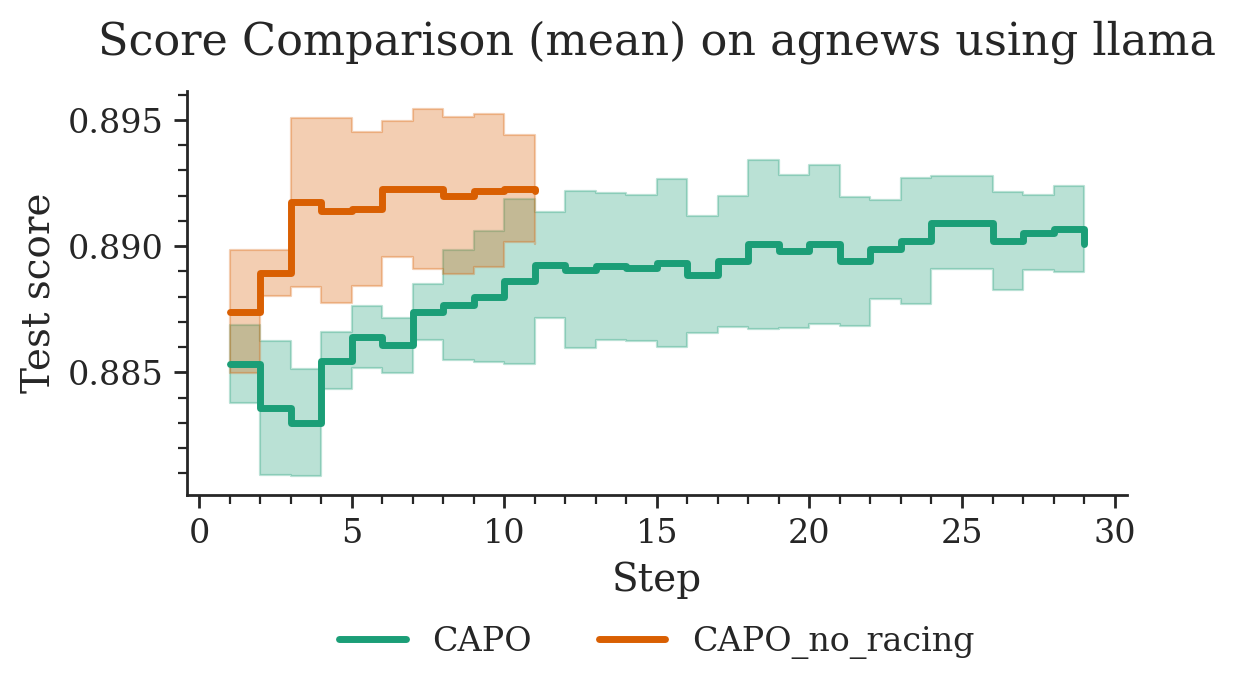

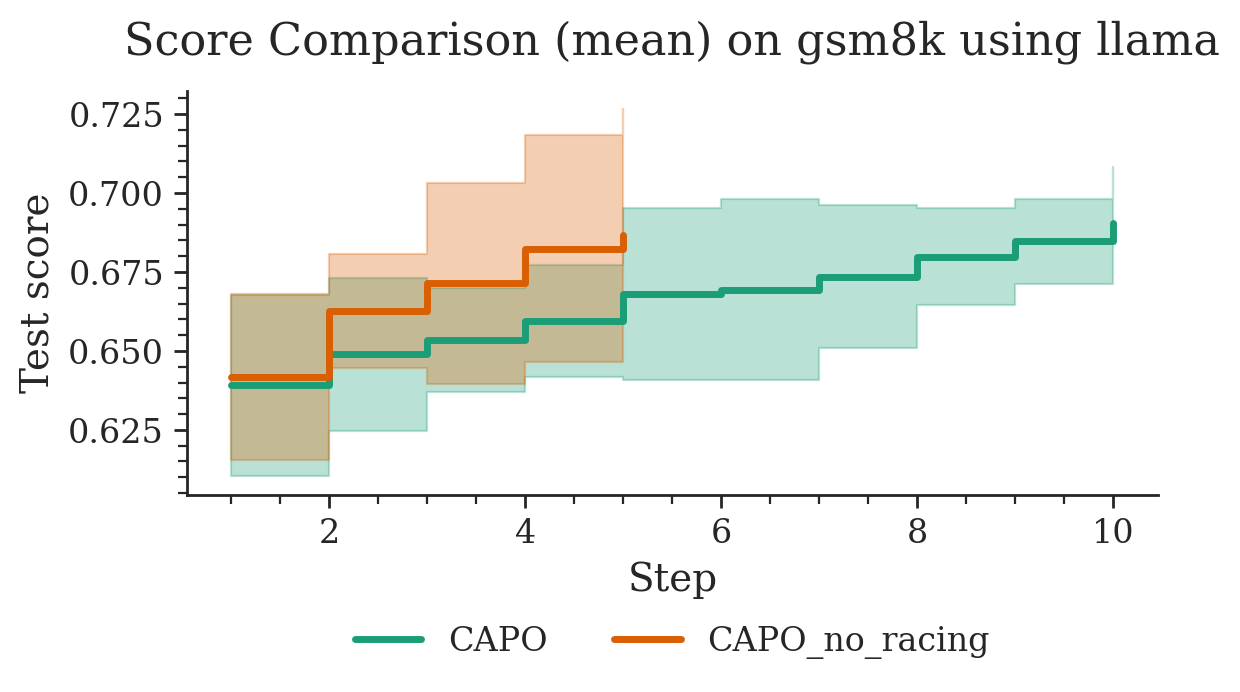

In [11]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "CAPO_no_racing"],
        path_prefix="../../temp",
        plot_stddev=True,
        x_col="step",
    )

- we can do much more steps if we do racing (3x for agnews/2x for gsm8k)
- in case of gsm8k we increase in performance, while for agnews we are worse than the no racing version
- performance differences lie really close to each other (within one sd)

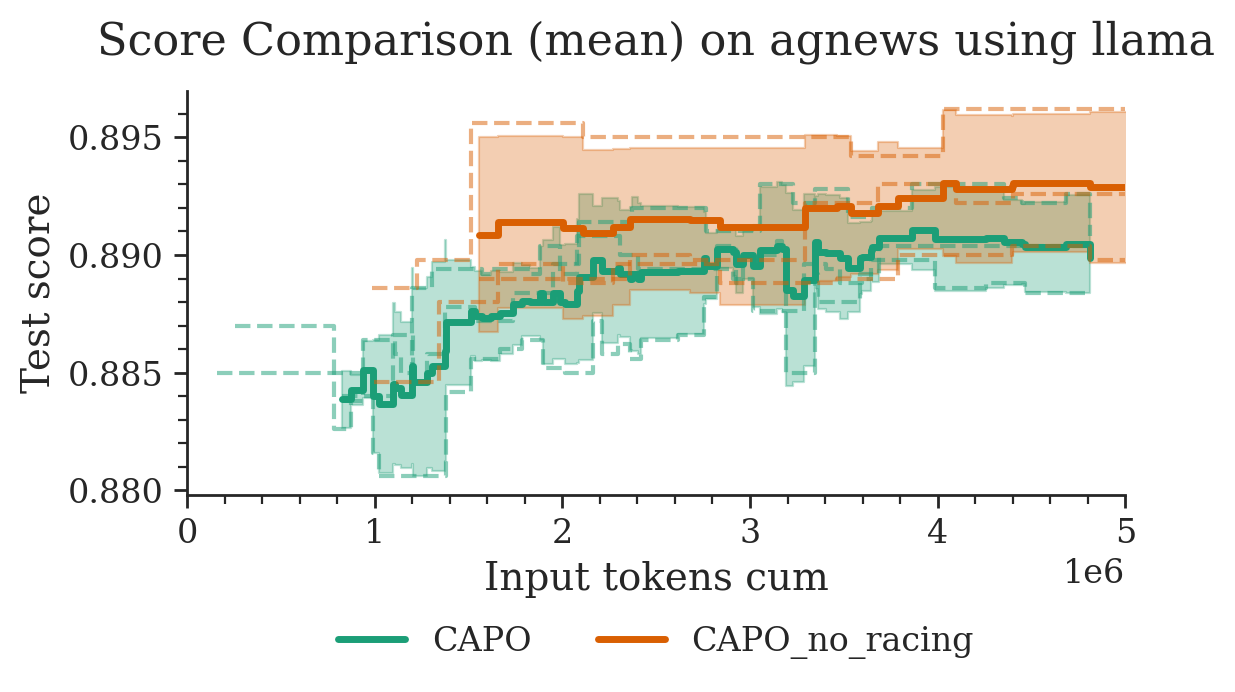

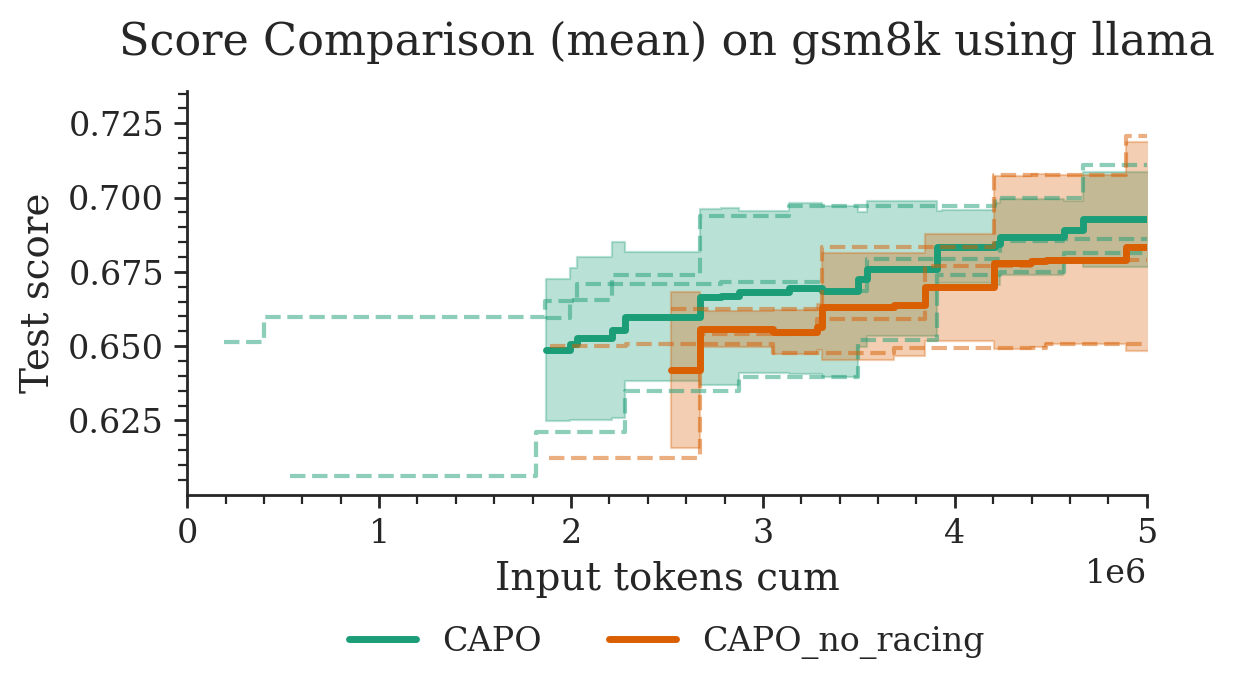

In [20]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "CAPO_no_racing"],
        path_prefix="../../temp",
        plot_stddev=True,
        plot_seeds=True,
        x_col="input_tokens_cum",
    )

- first results available after less tokens invested (about 500.000 tokens earlier for all seeds)
- in other seeds the results are already available much earlier (after just a couple of 100k tokens)

In [18]:
generate_comparison_table(DATASETS, ["CAPO", "CAPO_no_racing"], "llama", path_prefix="../../temp")

,agnews,gsm8k,avg
CAPO,89.07±0.64,73.73±4.57,81.4
CAPO_no_racing,89.2±0.53,75.0±3.82,82.1


## No Shuffling

Failed to load gsm8k for CAPO_no_shuffling: No objects to concatenate


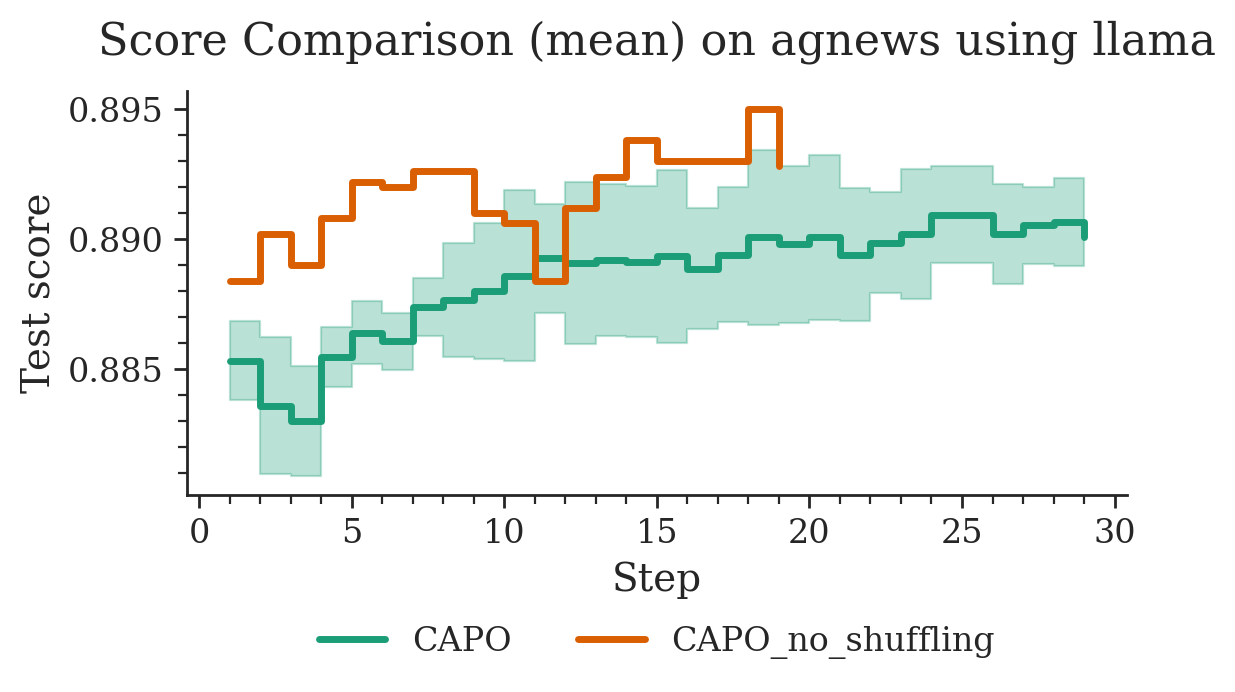

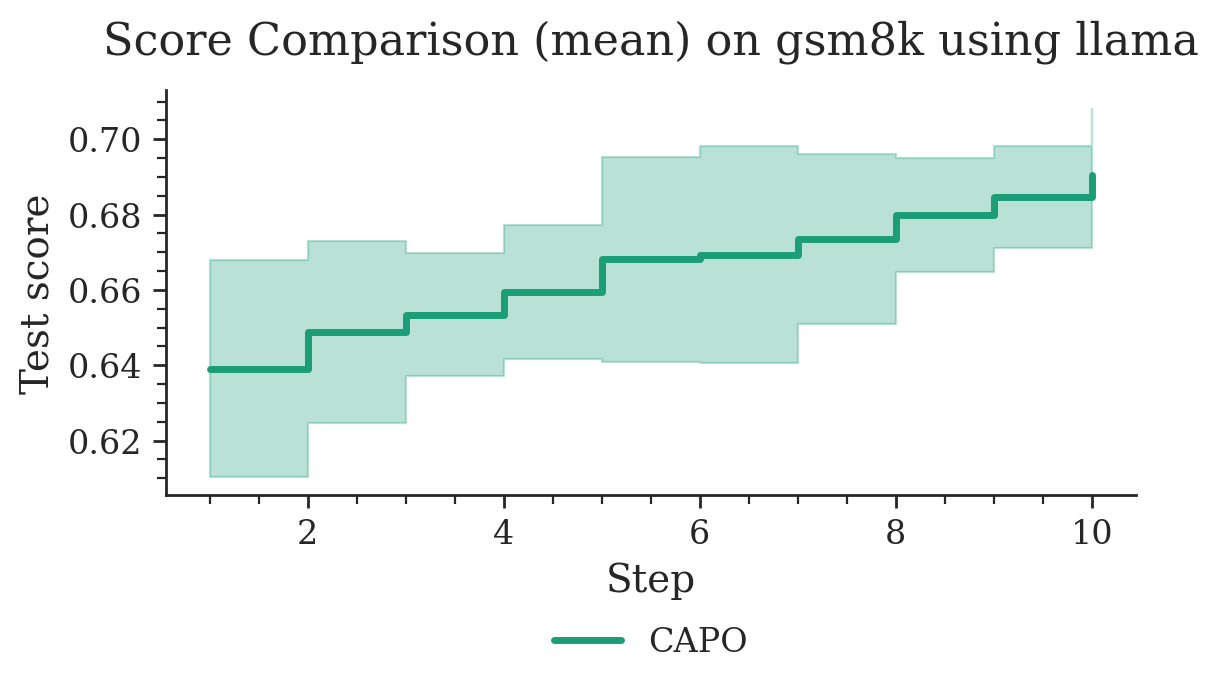

In [24]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "CAPO_no_shuffling"],
        path_prefix="../../temp",
        plot_stddev=True,
        x_col="step",
    )

## Zero Shot Performance

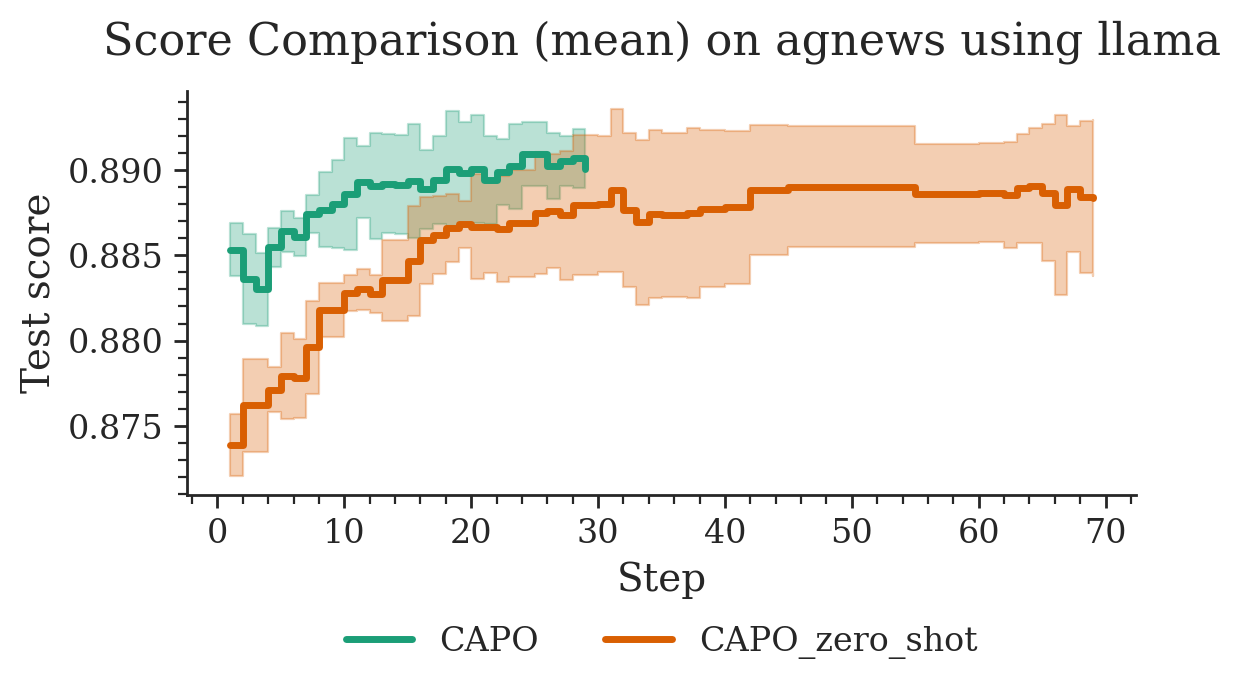

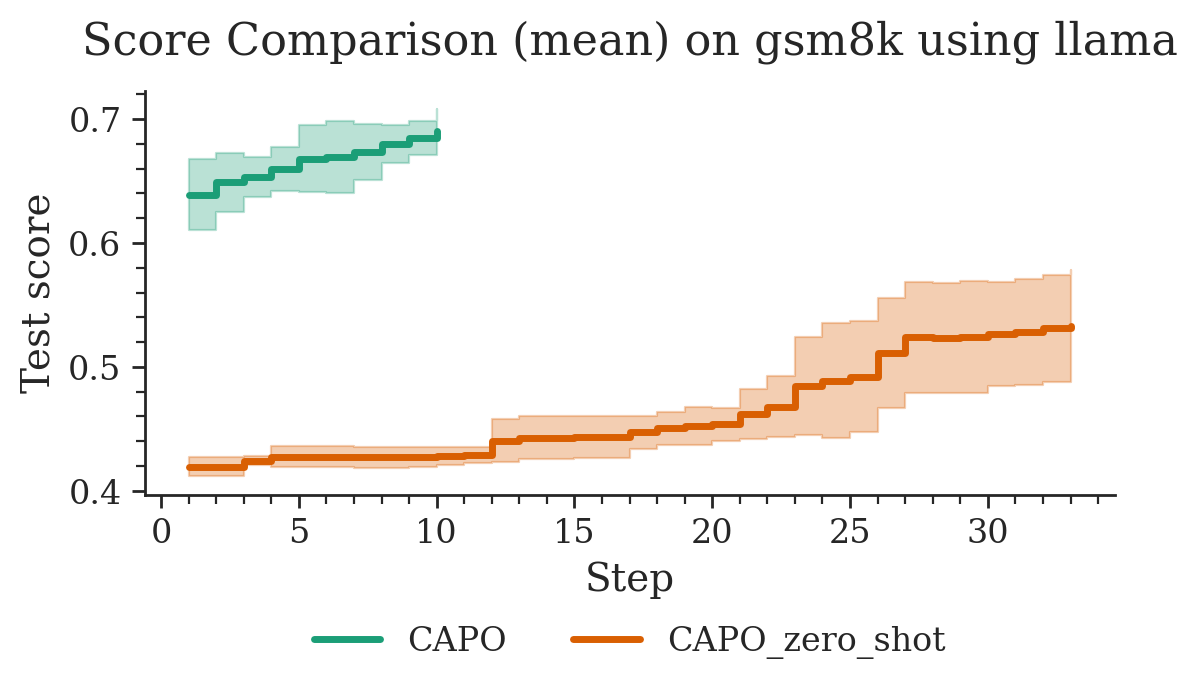

In [25]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "CAPO_zero_shot"],
        path_prefix="../../temp",
        plot_stddev=True,
        x_col="step",
    )

- we can do much more steps without few shots (less token consuming)
- for agnews we get better results in earlier steps when incorporation few-shots
- for gsm8k the shots have a great influence on the performance

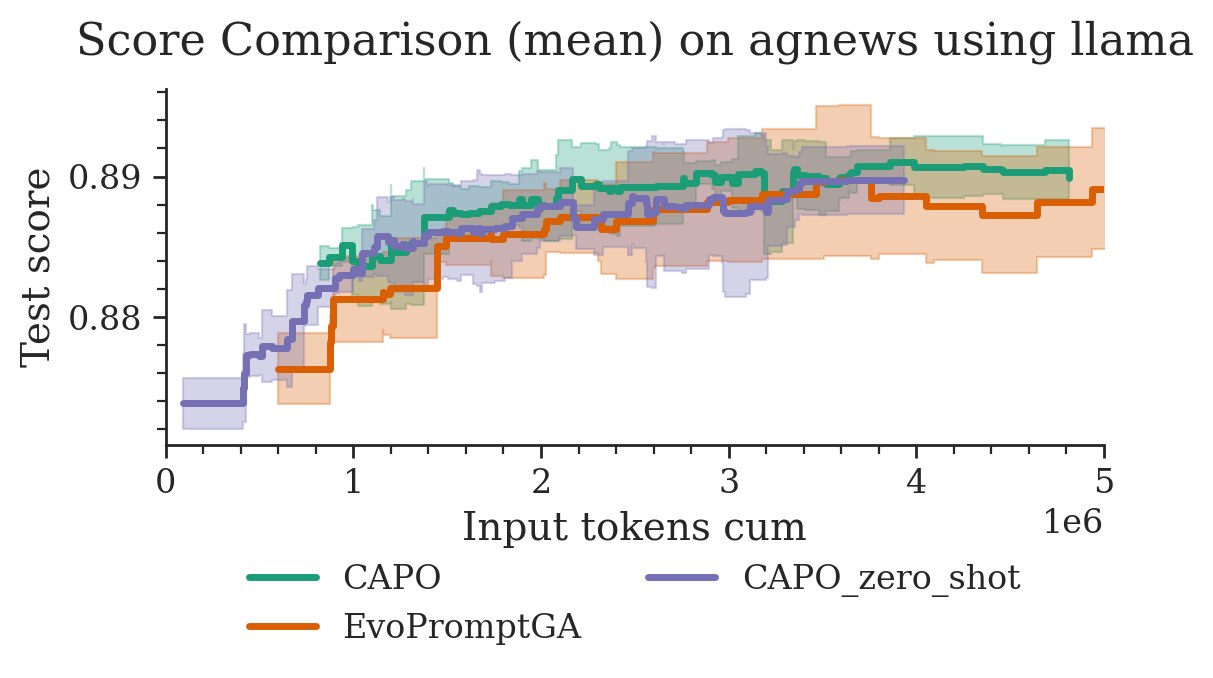

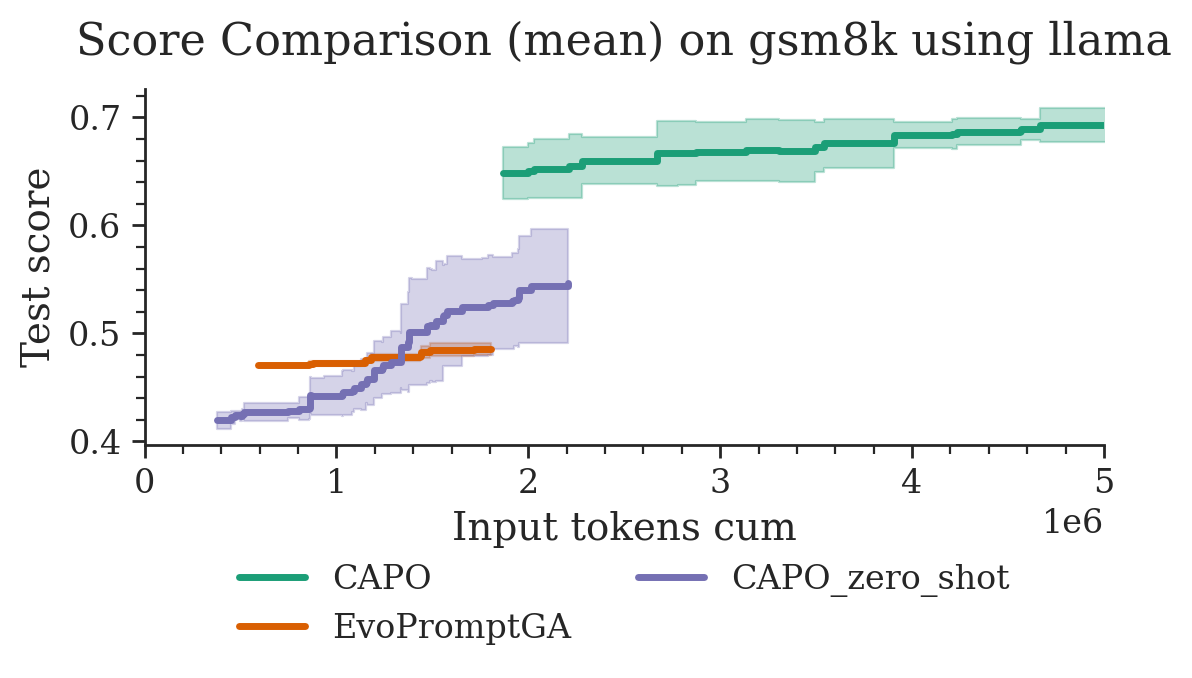

In [27]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "EvoPromptGA", "CAPO_zero_shot"],
        path_prefix="../../temp",
        plot_stddev=True,
        x_col="input_tokens_cum",
    )

- higher cost efficiency without few shots (good results are early available)
- despite starting not as good as EvoPrompt we manage to take over the lead 


## Generic Initializations

Failed to load agnews for CAPO_generic_init: No objects to concatenate
Failed to load agnews for EvoPrompt_generic_init: No objects to concatenate
Failed to load gsm8k for CAPO_generic_init: No objects to concatenate
Failed to load gsm8k for EvoPrompt_generic_init: No objects to concatenate


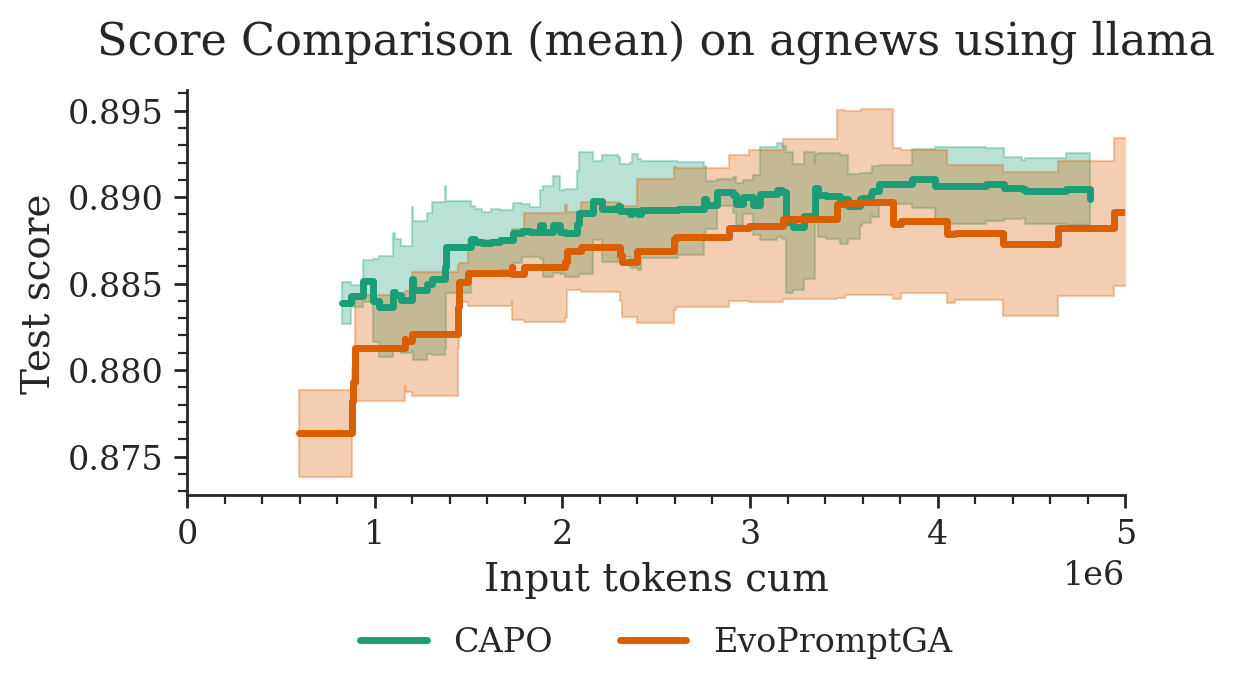

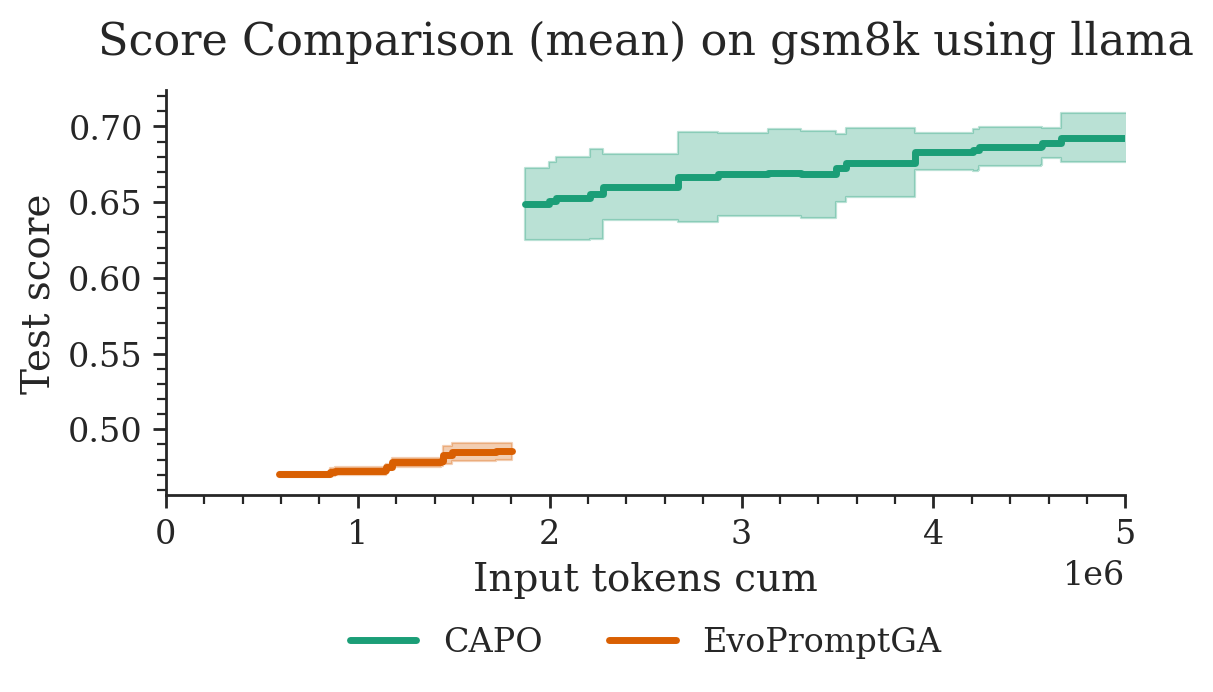

In [30]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "EvoPromptGA", "CAPO_generic_init", "EvoPrompt_generic_init"],
        path_prefix="../../temp",
        plot_stddev=True,
        x_col="input_tokens_cum",
    )

## EvoPrompt Simplified Template

Failed to load agnews for nan: No objects to concatenate
Failed to load gsm8k for nan: No objects to concatenate


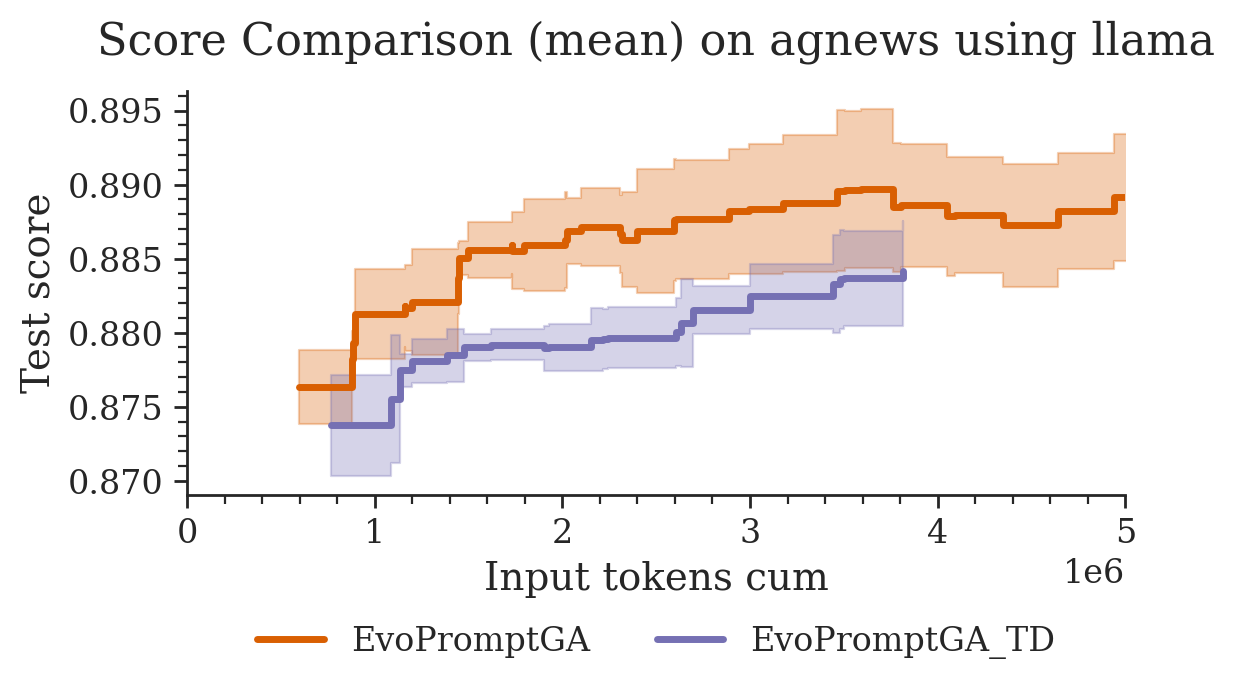

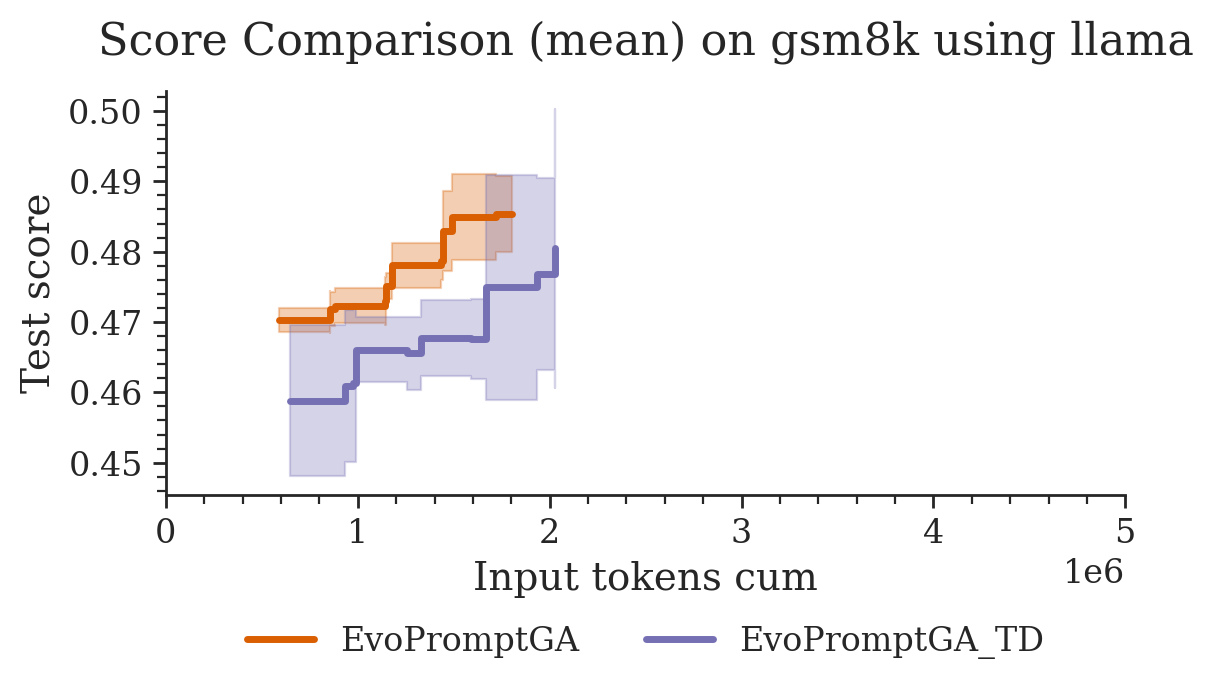

In [31]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["nan", "EvoPromptGA", "EvoPromptGA_TD"],
        path_prefix="../../temp",
        plot_stddev=True,
        x_col="input_tokens_cum",
    )

- using our simplified template (which also incorporates a task description) we perform slightly worse than the vanilla EvoPromptGA
- lets move this in the appendix